In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
# Read dataset
df = pd.read_csv("city_day.csv")

# Select features and target
features = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
target = 'AQI_Bucket'

# Filter relevant columns
df = df[['City','Datetime'] + features + [target]]


In [7]:
cities = df['City'].unique()
city_dfs = {city: df[df['City'] == city].reset_index(drop=True) for city in cities}


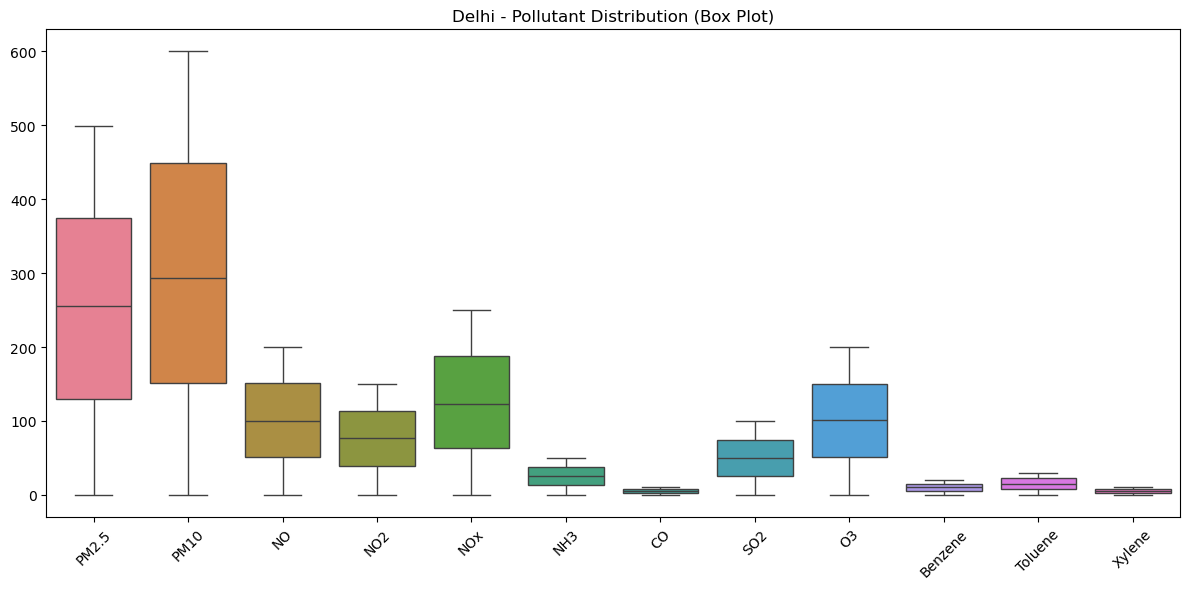

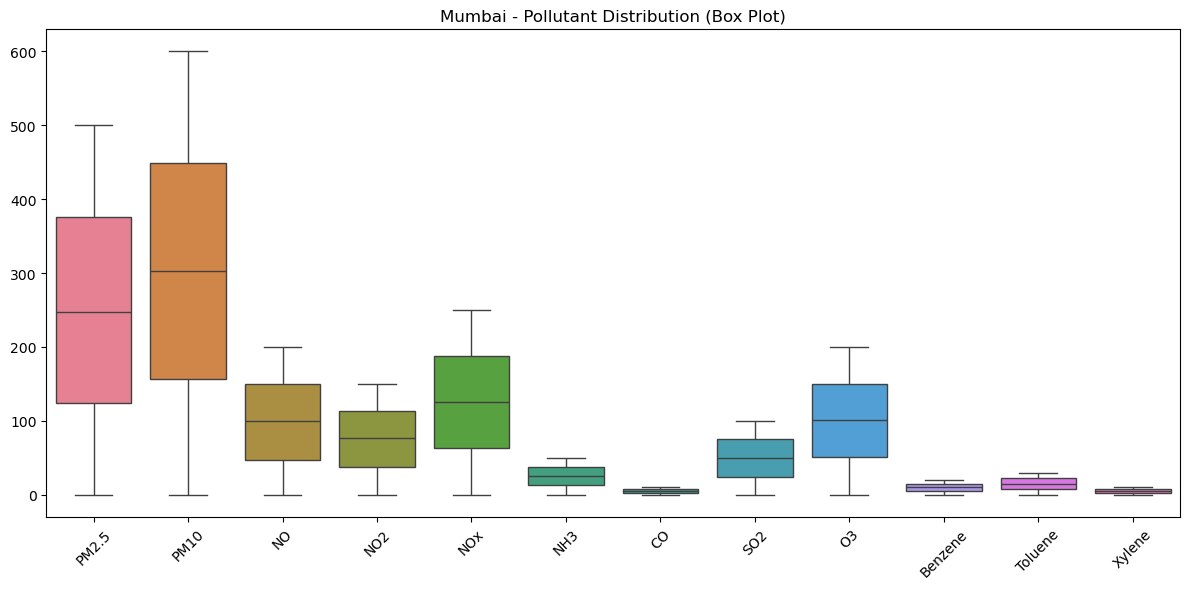

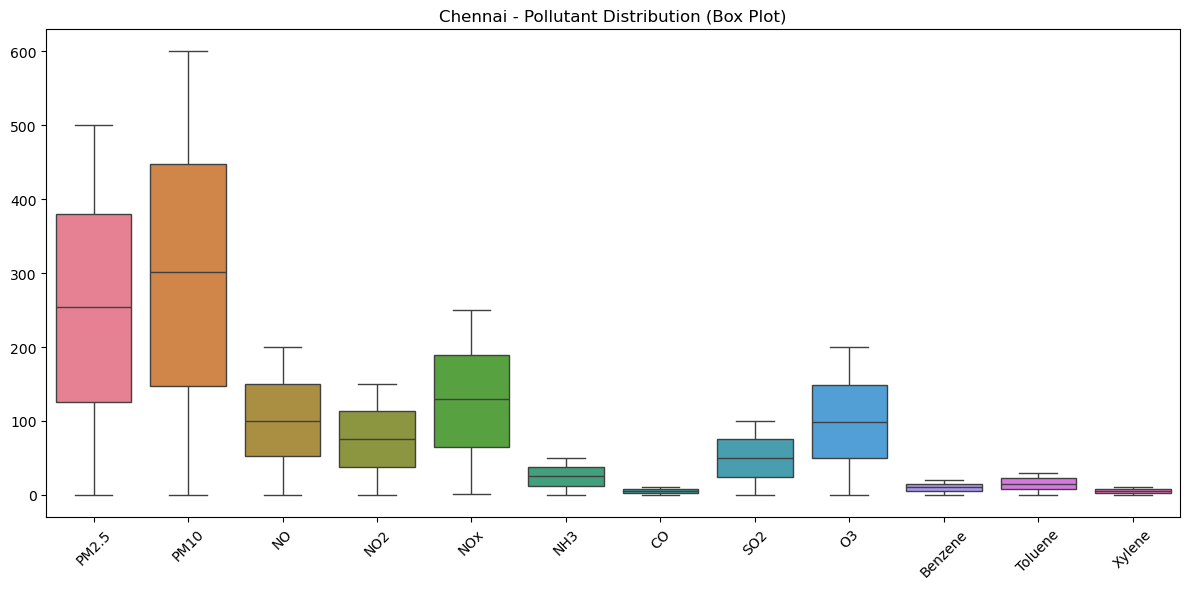

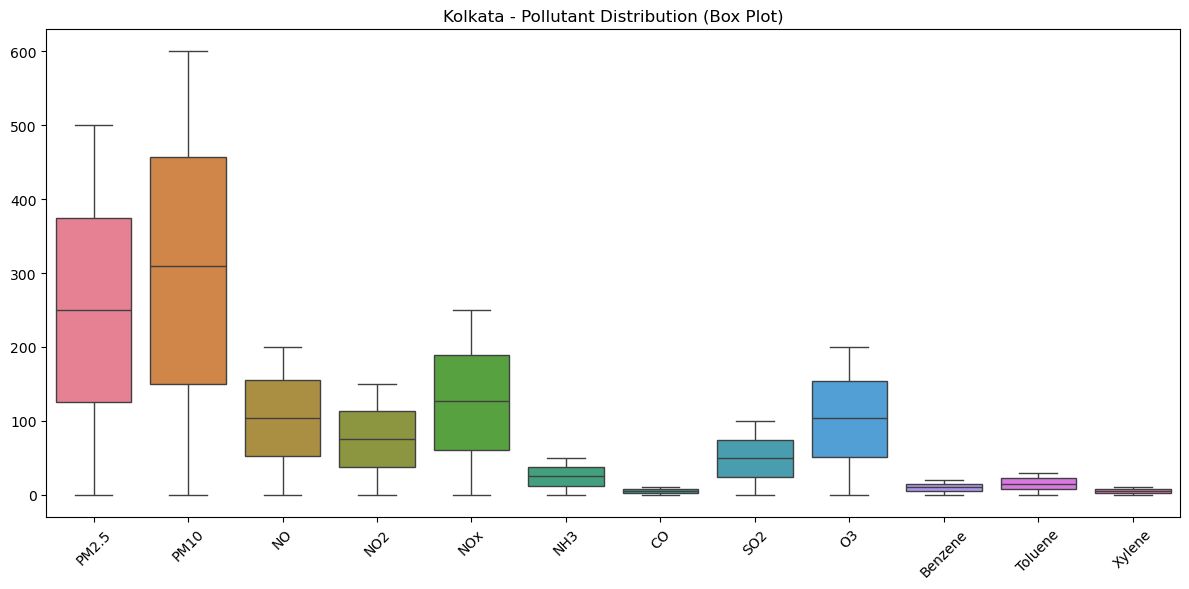

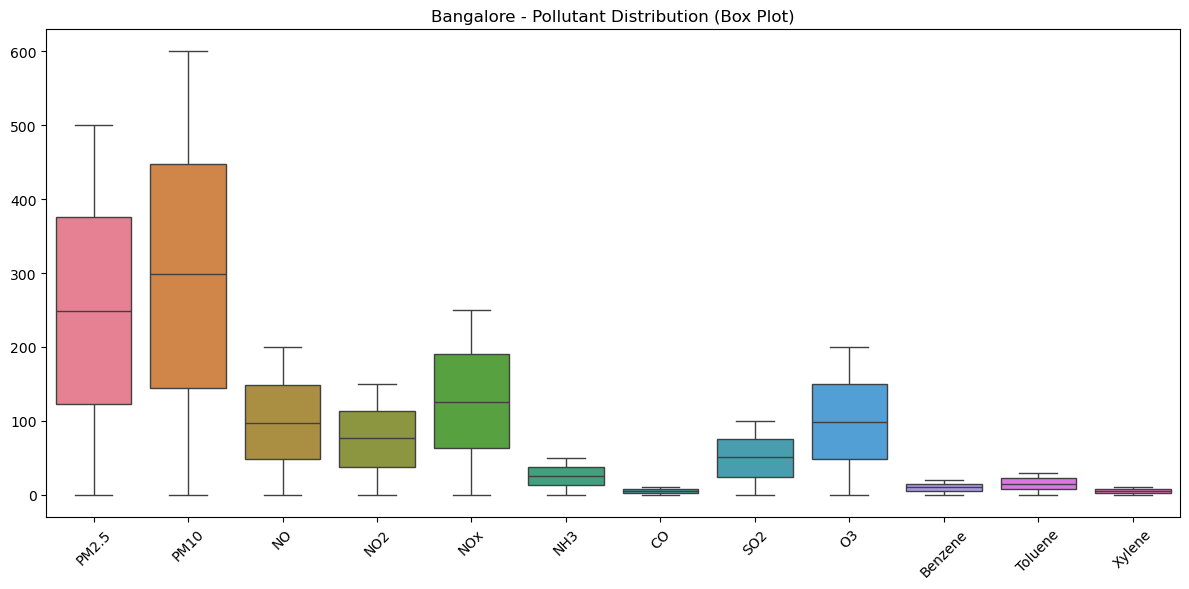

In [9]:
for city, data in city_dfs.items():
    plt.figure(figsize=(12,6))
    sns.boxplot(data=data[features])
    plt.title(f"{city} - Pollutant Distribution (Box Plot)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



=== Delhi ===
Accuracy: 0.15

Classification Report:
              precision    recall  f1-score   support

        Good       0.10      0.11      0.10       121
    Moderate       0.19      0.15      0.17       117
        Poor       0.16      0.16      0.16       119
Satisfactory       0.15      0.13      0.14       122
      Severe       0.11      0.14      0.12       127
   Very Poor       0.21      0.21      0.21       125

    accuracy                           0.15       731
   macro avg       0.15      0.15      0.15       731
weighted avg       0.15      0.15      0.15       731



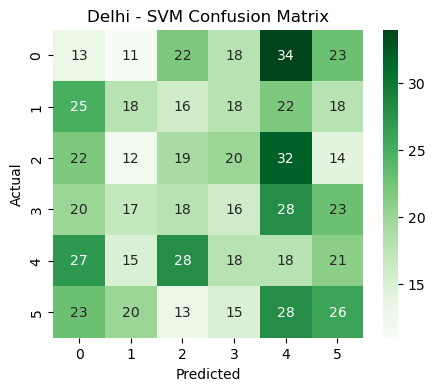


=== Mumbai ===
Accuracy: 0.15

Classification Report:
              precision    recall  f1-score   support

        Good       0.14      0.20      0.16       126
    Moderate       0.11      0.10      0.11       118
        Poor       0.18      0.11      0.14       124
Satisfactory       0.17      0.20      0.19       129
      Severe       0.18      0.24      0.20       121
   Very Poor       0.11      0.05      0.07       113

    accuracy                           0.15       731
   macro avg       0.15      0.15      0.15       731
weighted avg       0.15      0.15      0.15       731



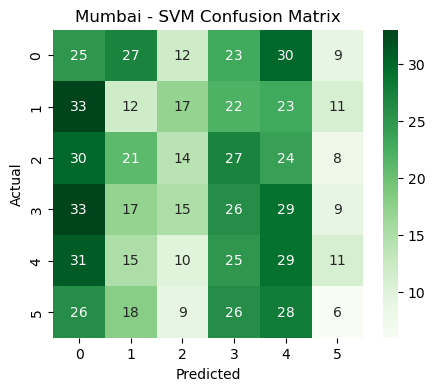


=== Chennai ===
Accuracy: 0.17

Classification Report:
              precision    recall  f1-score   support

        Good       0.18      0.22      0.20       128
    Moderate       0.18      0.14      0.16       114
        Poor       0.21      0.20      0.20       117
Satisfactory       0.19      0.21      0.20       126
      Severe       0.16      0.15      0.16       123
   Very Poor       0.13      0.11      0.12       123

    accuracy                           0.17       731
   macro avg       0.17      0.17      0.17       731
weighted avg       0.17      0.17      0.17       731



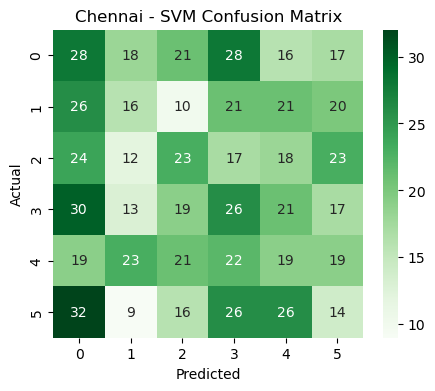


=== Kolkata ===
Accuracy: 0.18

Classification Report:
              precision    recall  f1-score   support

        Good       0.16      0.16      0.16       123
    Moderate       0.17      0.22      0.19       125
        Poor       0.19      0.18      0.19       120
Satisfactory       0.19      0.16      0.17       118
      Severe       0.23      0.21      0.22       124
   Very Poor       0.13      0.12      0.13       121

    accuracy                           0.18       731
   macro avg       0.18      0.18      0.18       731
weighted avg       0.18      0.18      0.18       731



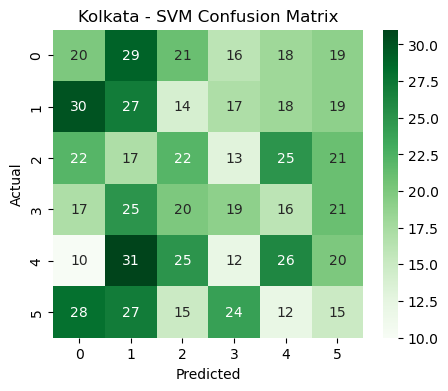


=== Bangalore ===
Accuracy: 0.18

Classification Report:
              precision    recall  f1-score   support

        Good       0.17      0.20      0.18       122
    Moderate       0.16      0.13      0.14       116
        Poor       0.17      0.19      0.18       123
Satisfactory       0.17      0.19      0.18       124
      Severe       0.21      0.25      0.23       130
   Very Poor       0.18      0.11      0.14       116

    accuracy                           0.18       731
   macro avg       0.18      0.18      0.17       731
weighted avg       0.18      0.18      0.18       731



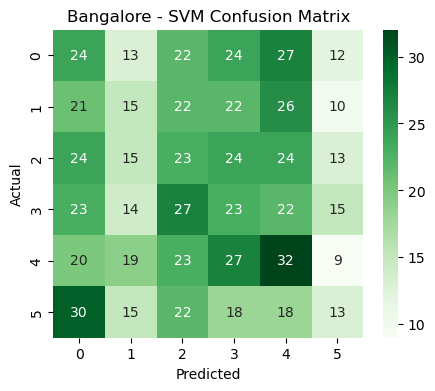


Overall City-wise Accuracy (SVM):
        City  Accuracy
0      Delhi  0.150479
1     Mumbai  0.153215
2    Chennai  0.172367
3    Kolkata  0.176471
4  Bangalore  0.177839


In [11]:
results = []

for city, data in city_dfs.items():
    X = data[features]
    y = data[target]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Standardize features (SVM is sensitive to feature scaling)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train SVM classifier
    svm = SVC(kernel='rbf', C=1.0, gamma='scale')
    svm.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = svm.predict(X_test_scaled)
    
    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    results.append({'City': city, 'Accuracy': acc})
    
    print(f"\n=== {city} ===")
    print(f"Accuracy: {acc:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix visualization
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
    plt.title(f"{city} - SVM Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Combine results
results_df = pd.DataFrame(results)
print("\nOverall City-wise Accuracy (SVM):")
print(results_df)
